In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import QuantileTransformer

In [18]:

# for pandas version >= 0.21.0
df = pd.read_excel('BreastTissue.xls', sheet_name='Data', index_col= 0)


In [19]:
df.head()

,Class,I0,PA500,HFS,DA,Area,A/DA,Max IP,DR,P
Case #,,,,,,,,,,
1,car,524.794072,0.187448,0.032114,228.800228,6843.598481,29.910803,60.204880,220.737212,556.828334
2,car,330.000000,0.226893,0.265290,121.154201,3163.239472,26.109202,69.717361,99.084964,400.225776
3,car,551.879287,0.232478,0.063530,264.804935,11888.391827,44.894903,77.793297,253.785300,656.769449
4,car,380.000000,0.240855,0.286234,137.640111,5402.171180,39.248524,88.758446,105.198568,493.701814
5,car,362.831266,0.200713,0.244346,124.912559,3290.462446,26.342127,69.389389,103.866552,424.796503


In [20]:
df.describe()

,I0,PA500,HFS,DA,Area,A/DA,Max IP,DR,P
count,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000
mean,784.251618,0.120133,0.114691,190.568642,7335.155162,23.473784,75.381258,166.710575,810.638127
std,753.950075,0.068596,0.101347,190.801448,18580.314213,23.354672,81.345838,181.309580,763.019135
min,103.000000,0.012392,-0.066323,19.647670,70.426239,1.595742,7.968783,-9.257696,124.978561
25%,250.000000,0.067413,0.043982,53.845470,409.647141,8.180321,26.893773,41.781258,270.215238
50%,384.936489,0.105418,0.086568,120.777303,2219.581163,16.133657,44.216040,97.832557,454.108153
75%,1487.989626,0.169602,0.166504,255.334809,7615.204968,30.953294,83.671755,232.990070,1301.559438
max,2800.000000,0.358316,0.467748,1063.441427,174480.476218,164.071543,436.099640,977.552367,2896.582483


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


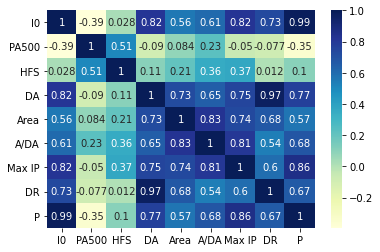

In [21]:

import seaborn as sns
correlations = df[df.columns].corr(method='pearson')
sns.heatmap(correlations, cmap="YlGnBu", annot = True)

In [22]:
import heapq

print('Absolute overall correlations')
print('-' * 30)
correlations_abs_sum = correlations[correlations.columns].abs().sum()
print(correlations_abs_sum, '\n')

print('Weakest correlations')
print('-' * 30)
print(correlations_abs_sum.nsmallest(2))

Absolute overall correlations
------------------------------
I0        5.959493
PA500     2.779037
HFS       2.691318
DA        5.897323
Area      5.396149
A/DA      5.709313
Max IP    6.008322
DR        5.278883
P         5.992063
dtype: float64 

Weakest correlations
------------------------------
HFS      2.691318
PA500    2.779037
dtype: float64


In [23]:
df['Class'].value_counts()


adi    22
car    21
mas    18
gla    16
fad    15
con    14
Name: Class, dtype: int64

In [24]:
y=  df.iloc[:,0].values
X = df.iloc[:, 1:].values


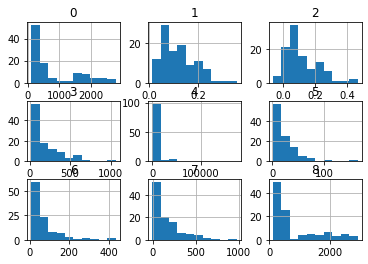

In [25]:
dataset = pd.DataFrame(X)
# histograms of the variables
dataset.hist()
plt.show()

##Data transformation to Gaussion Distribution


In [ ]:
trans = QuantileTransformer(n_quantiles=100, output_distribution='normal')
data = trans.fit_transform(X)
data

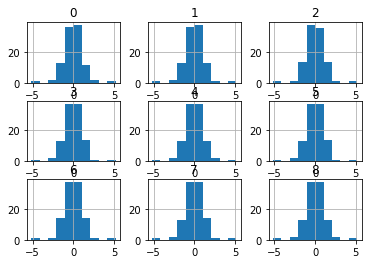

In [27]:
dataset = pd.DataFrame(data)
# histograms of the variables
dataset.hist()
plt.show()

In [28]:
X.shape

(106, 9)

In [29]:
y.shape
y = pd.get_dummies(y)
y

,adi,car,con,fad,gla,mas
0,0,1,0,0,0,0
1,0,1,0,0,0,0
2,0,1,0,0,0,0
3,0,1,0,0,0,0
4,0,1,0,0,0,0
...,...,...,...,...,...,...
101,1,0,0,0,0,0
102,1,0,0,0,0,0
103,1,0,0,0,0,0
104,1,0,0,0,0,0


In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset,y, test_size = 0.20)

##Neural Network with Drop out


In [50]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
import keras

model = Sequential()
model.add(Dense(units = 100, activation = 'relu' ))
model.add(Dropout(0.2))

model.add(Dense(units = 50, activation= 'relu'))
model.add(Dropout(0.2))

model.add(Dense(units = 6, activation='softmax'))

opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer= opt,  loss = 'categorical_crossentropy', metrics= ['accuracy'])

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=32 , epochs=100 )
print(history.history.keys())

Epoch 1/100

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

3/3 [==============================] - 0s 59ms/step - loss: 1.5751 - accuracy: 0.3214 - val_loss: 1.2404 - val_accuracy: 0.5455
Epoch 2/100
3/3 [==============================] - 0s 8ms/step - loss: 1.1054 - accuracy: 0.6429 - val_loss: 0.9334 - val_accuracy: 0.5909
Epoch 3/100
3/3 [==============================] - 0s 8ms/step - loss: 0.9374 - accuracy: 0.6548 - val_loss: 0.9175 - val_accuracy: 0.6364
Epoch 4/100
3/3 [==============================] - 0s 8ms/step - loss: 0.7643 - accuracy: 

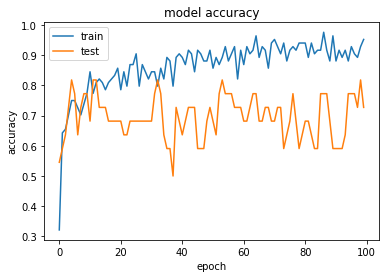

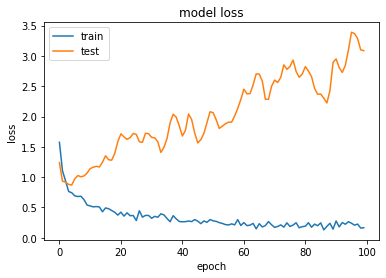

In [51]:

# list all data in history

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

##Neural Network with L1 Regularizers


In [52]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
import keras
from tensorflow.keras import regularizers

model = Sequential()
model.add(Dense(units = 100, kernel_regularizer=regularizers.l1(0.001), activation = 'relu' ))


model.add(Dense(units = 50, kernel_regularizer=regularizers.l1(0.001), activation= 'relu'))


model.add(Dense(units = 6, activation='softmax'))

opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer= opt,  loss = 'categorical_crossentropy', metrics= ['accuracy'])

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=32 , epochs=100 )
print(history.history.keys())

Epoch 1/100

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

3/3 [==============================] - 0s 70ms/step - loss: 2.1789 - accuracy: 0.3571 - val_loss: 1.7176 - val_accuracy: 0.6364
Epoch 2/100
3/3 [==============================] - 0s 9ms/step - loss: 1.5971 - accuracy: 0.6905 - val_loss: 1.4169 - val_accuracy: 0.6818
Epoch 3/100
3/3 [==============================] - 0s 8ms/step - loss: 1.3202 - accuracy: 0.7381 - val_loss: 1.4390 - val_accuracy: 0.7273
Epoch 4/100
3/3 [==============================] - 0s 9ms/step - loss: 1.2308 - accuracy: 

In [53]:
y_pred = model.predict(X_test)

In [54]:
score = model.evaluate(X_test, y_test)
score[1]*100

1/1 [==============================] - 0s 2ms/step - loss: 2.2320 - accuracy: 0.7273


72.72727489471436